In [67]:
# Import pandas library and the data set
import pandas as pd
df = pd.read_csv('mushrooms.csv')

In [68]:
# Have a look at the first five rows
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [69]:
# Check if there are any missing data
df.isnull().values.any()

False

In [70]:
# Have a look at the data set's columns
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [71]:
# Have a look at the data set's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [72]:
# Retrieve X and y from the data set
X = df.drop('class', axis=1)
y = df['class']

In [73]:
# Data encoding using dummies
X = pd.get_dummies(X, columns=X.columns, drop_first=True)

In [74]:
# StandardScale the dataset and convert it back to dataframe type
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [75]:
# Split X and y to training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [76]:
# Use GridSearch to support SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': range(3, 8)
}
grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)

# View The Best Parameters
print(grid_search.best_params_)

# Fit the training tests using the best parameters
best_grid = SVC(**grid_search.best_params_)
best_grid.fit(X_train,y_train)

# Get the predicted y
predictions = best_grid.predict(X_test)

{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           e       1.00      1.00      1.00       820
           p       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



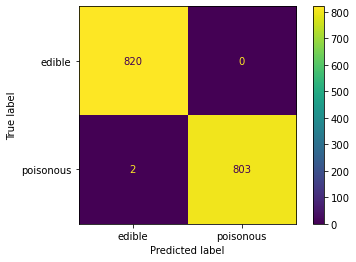

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Plot the confusion matrix
plot_confusion_matrix(best_grid, X_test, y_test, display_labels=['edible', 'poisonous'])

# print classification report 
print(classification_report(y_test, predictions)) 